In [1]:
# import Class
from classy import Class
import numpy as np
# to get plots displayed in notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from math import pi

In [15]:
# compute LCDM model with linear perturbations only
modell = Class()
modell.struct_cleanup()
modell.set({'omega_cdm':0.1205, "omega_b":0.02218, "h":0.67, "tau_reio":0.07})
modell.set({"tau_reio":0.07,"ln10^{10}A_s":3.056,"n_s":0.9619})
modell.set({"tight_coupling_trigger_tau_c_over_tau_h":0.0, "tight_coupling_trigger_tau_c_over_tau_k":0.0})
modell.set({"output":"tCl, lCl, pCl, mPk", "root":"test_output/lcdm_","recombination":"recfast", "gauge":"synchronous"})
modell.set({"root": "test_output/lcdm_","write thermodynamics":"yes", "write background":"yes", "lensing":"yes"})
modell.set({"k_per_decade_for_pk":100, "P_k_max_h/Mpc":5})
modell.set({"z_pk": 0})
modell.compute()

In [16]:
# calculate cls and Pk for LCDM with linear perturbations only
cls = modell.lensed_cl(2500)
Pk = []
kk = np.logspace(-5,np.log10(3),1000)
for k in kk:
    Pk.append(modell.pk(k,0)) # function .pk(k,z)
Pk = np.array(Pk)
# get Cls and Pks 
ll = cls['ell'][2:]
clPP = cls['pp'][2:]
clTT = cls['tt'][2:]



<IPython.core.display.Javascript object>


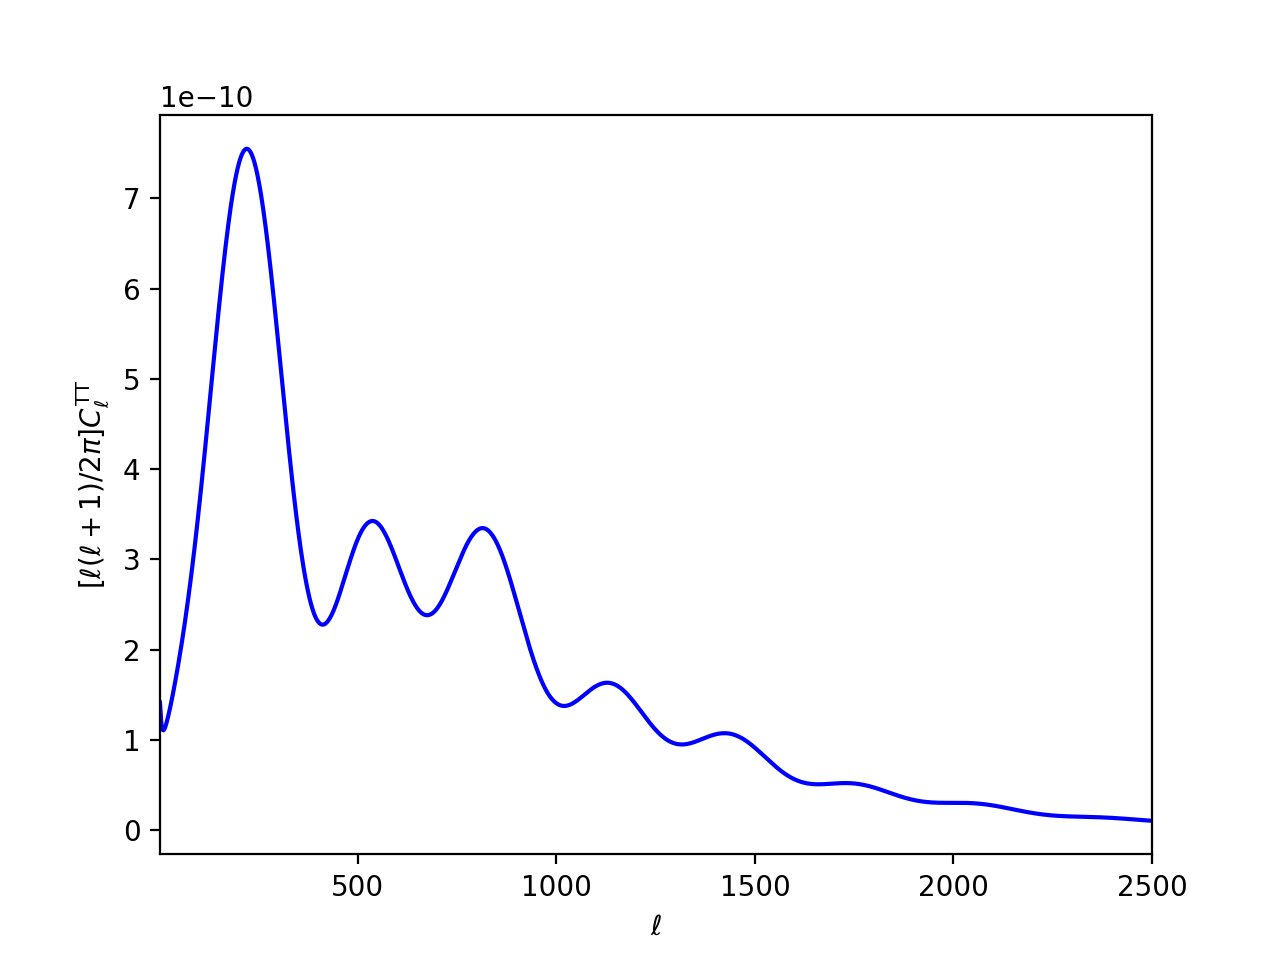

<IPython.core.display.Javascript object>


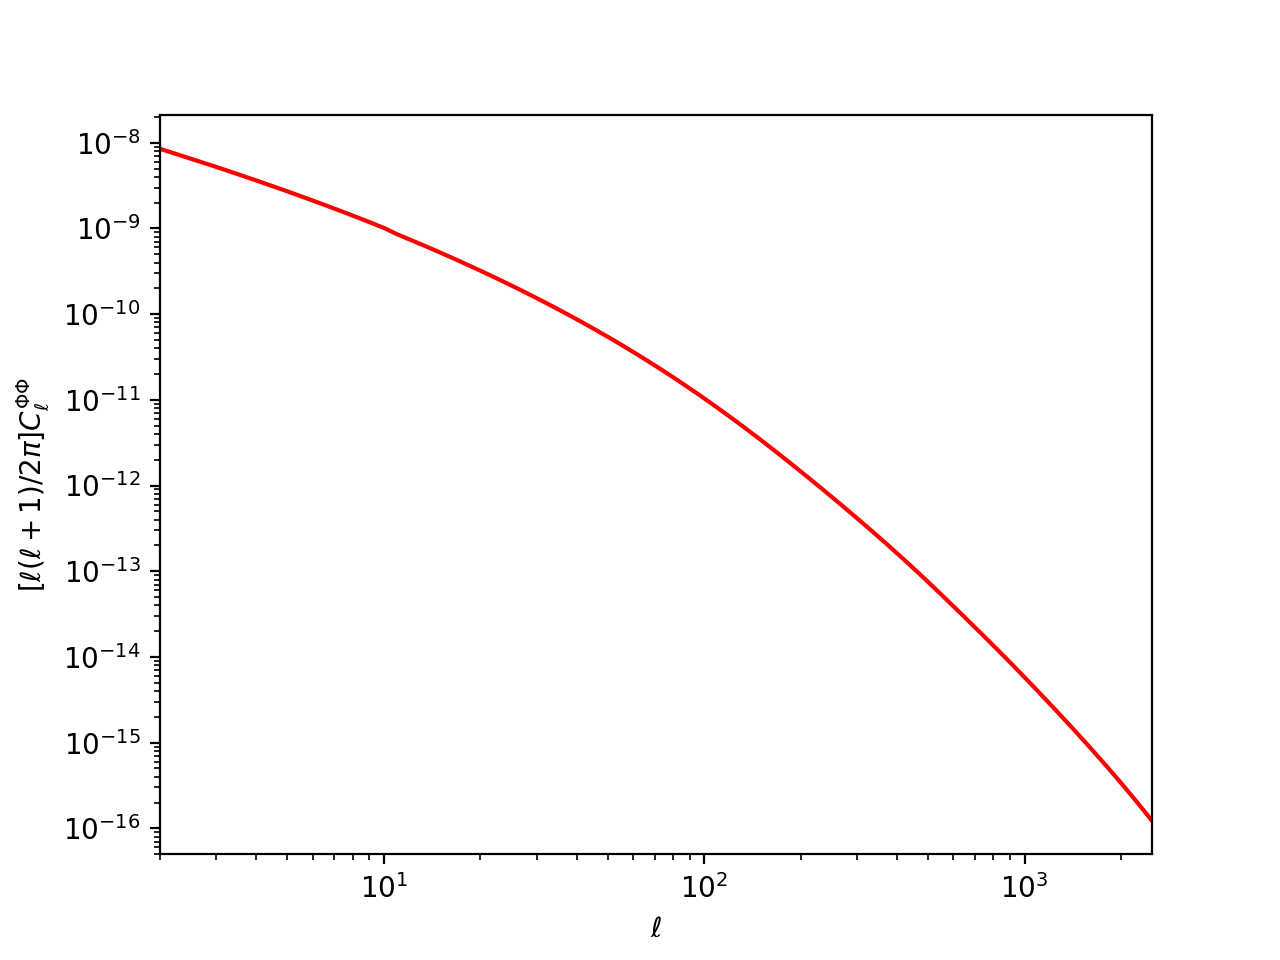

<IPython.core.display.Javascript object>


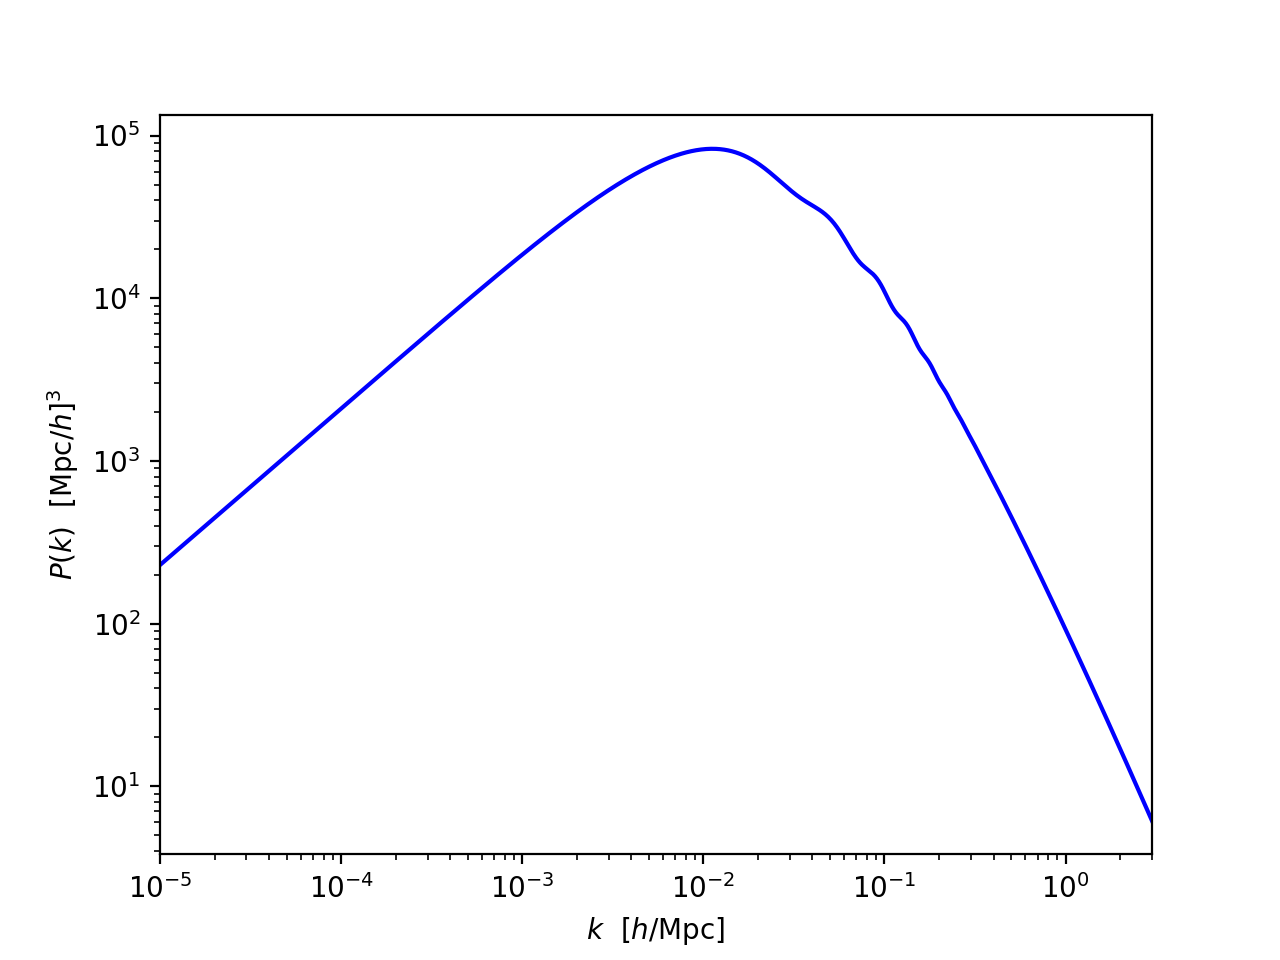

In [17]:
# plot C_l^TT
plt.figure()
plt.xscale('linear');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'b-')
plt.show()
# plot C_l^PP
plt.figure()
plt.xscale('log');plt.yscale('log');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{\Phi\Phi}$')
plt.plot(ll,clPP*ll*(ll+1)/2./pi,'r-')
plt.show()
# plot P(k)
plt.figure()
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-')
plt.show()

<IPython.core.display.Javascript object>


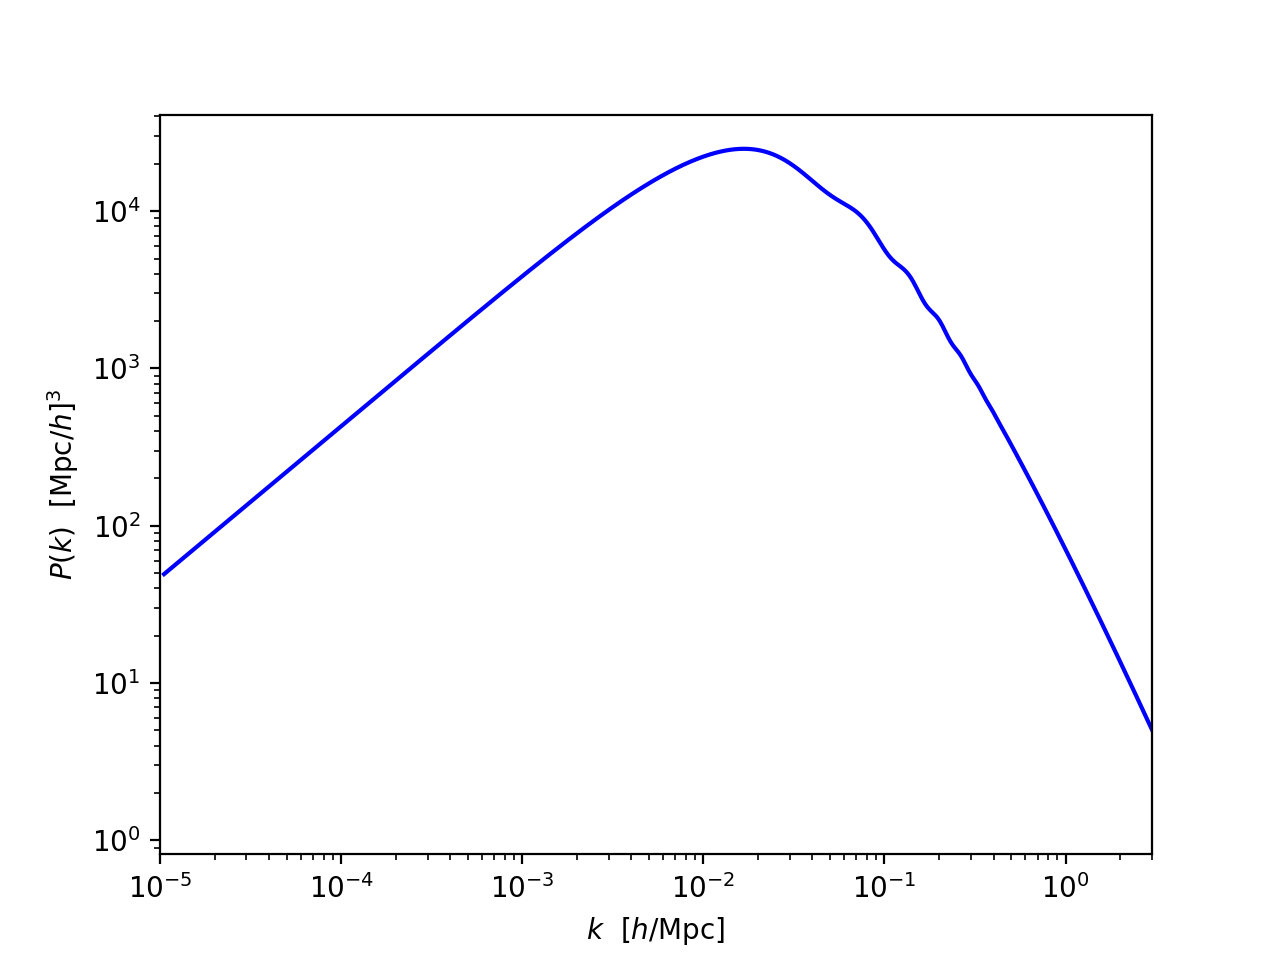

In [14]:
lcdm = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/lcdm_pk.dat")[:,1]
kk_lcdm = np.genfromtxt("/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/lcdm_pk.dat")[:,0]
# plot P(k)
plt.figure()
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk_lcdm,lcdm,'b-')
plt.show()
# as can be seen from the two plots, there is a problem - they differ by factor of one, so not good